## 1. Install and Import Dependencies

In [1]:
import warnings;
warnings.simplefilter('ignore')

In [2]:
!pip install pystan prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
from prophet import Prophet

## 2. Read in Data and Process Data

In [102]:
df = pd.read_csv(r'/content/goldstock.csv', encoding='latin1')
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [103]:
df.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [104]:
df.dtypes

Unnamed: 0      int64
Date           object
Close         float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

In [105]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [106]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [107]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low,Year,Month,Day
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,2024,1,19
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,2024,1,18
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,2024,1,17
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,2024,1,16
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,2024,1,12


In [108]:
df.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Close                float64
Volume               float64
Open                 float64
High                 float64
Low                  float64
Year                   int32
Month                  int32
Day                    int32
dtype: object

In [109]:
df.columns

Index(['Unnamed: 0', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low', 'Year',
       'Month', 'Day'],
      dtype='object')

In [110]:
df.drop(columns = ['Unnamed: 0','Close', 'Volume', 'High', 'Low', 'Year',
       'Month', 'Day'], axis=1, inplace=True)
df.columns = ['ds', 'y']

In [111]:
df.head()

,ds,y
0,2024-01-19,2027.4
1,2024-01-18,2009.1
2,2024-01-17,2031.7
3,2024-01-16,2053.4
4,2024-01-12,2033.2


In [112]:
df = df.sort_values(by = 'ds')

In [113]:
df

,ds,y
2510,2014-01-22,1240.5
2509,2014-01-23,1235.1
2508,2014-01-24,1264.3
2507,2014-01-27,1269.9
2506,2014-01-28,1254.9
...,...,...
4,2024-01-12,2033.2
3,2024-01-16,2053.4
2,2024-01-17,2031.7
1,2024-01-18,2009.1


## 3. Train Model

In [114]:
m = Prophet(interval_width = 0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbx5hkmk/_9y_dkdz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbx5hkmk/exn8ai2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40764', 'data', 'file=/tmp/tmprbx5hkmk/_9y_dkdz.json', 'init=/tmp/tmprbx5hkmk/exn8ai2y.json', 'output', 'file=/tmp/tmprbx5hkmk/prophet_modelxsdqriks/prophet_model-20240703184439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 4. Forecast Away

In [115]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-22,1246.490538,1217.455001,1406.427367,1246.490538,1246.490538,66.107587,66.107587,66.107587,55.945697,55.945697,55.945697,2.286399,2.286399,2.286399,7.875492,7.875492,7.875492,0.0,0.0,0.0,1312.598125
1,2014-01-23,1246.277796,1212.440958,1416.036377,1246.277796,1246.277796,66.835154,66.835154,66.835154,55.945697,55.945697,55.945697,2.884550,2.884550,2.884550,8.004907,8.004907,8.004907,0.0,0.0,0.0,1313.112950
2,2014-01-24,1246.065055,1213.384325,1423.354050,1246.065055,1246.065055,66.760641,66.760641,66.760641,55.945697,55.945697,55.945697,2.713027,2.713027,2.713027,8.101917,8.101917,8.101917,0.0,0.0,0.0,1312.825695
3,2014-01-27,1245.426830,1213.942711,1411.732535,1245.426830,1245.426830,67.721841,67.721841,67.721841,55.945697,55.945697,55.945697,3.528804,3.528804,3.528804,8.247340,8.247340,8.247340,0.0,0.0,0.0,1313.148671
4,2014-01-28,1245.214089,1211.367345,1409.574570,1245.214089,1245.214089,66.782097,66.782097,66.782097,55.945697,55.945697,55.945697,2.573672,2.573672,2.573672,8.262729,8.262729,8.262729,0.0,0.0,0.0,1311.996186


In [116]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2588,2024-04-24,1956.516471,1936.700089,2161.039030,1908.298275,2005.963369,87.680041,87.680041,87.680041,55.945697,55.945697,55.945697,2.286399,2.286399,2.286399,29.447945,29.447945,29.447945,0.0,0.0,0.0,2044.196512
2589,2024-04-25,1956.782327,1931.192641,2150.878085,1907.687850,2006.776930,87.153028,87.153028,87.153028,55.945697,55.945697,55.945697,2.884550,2.884550,2.884550,28.322782,28.322782,28.322782,0.0,0.0,0.0,2043.935355
2590,2024-04-26,1957.048182,1926.170910,2151.715764,1907.582542,2007.579362,85.830862,85.830862,85.830862,55.945697,55.945697,55.945697,2.713027,2.713027,2.713027,27.172139,27.172139,27.172139,0.0,0.0,0.0,2042.879044
2591,2024-04-27,1957.314037,1913.296401,2146.684108,1907.477234,2008.375089,74.970667,74.970667,74.970667,55.945697,55.945697,55.945697,-6.993224,-6.993224,-6.993224,26.018195,26.018195,26.018195,0.0,0.0,0.0,2032.284705
2592,2024-04-28,1957.579893,1917.781155,2146.792560,1907.371926,2009.809360,73.834638,73.834638,73.834638,55.945697,55.945697,55.945697,-6.993228,-6.993228,-6.993228,24.882169,24.882169,24.882169,0.0,0.0,0.0,2031.414531


In [117]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2014-01-22,1312.598125
1,2014-01-23,1313.112950
2,2014-01-24,1312.825695
3,2014-01-27,1313.148671
4,2014-01-28,1311.996186
...,...,...
2588,2024-04-24,2044.196512
2589,2024-04-25,2043.935355
2590,2024-04-26,2042.879044
2591,2024-04-27,2032.284705


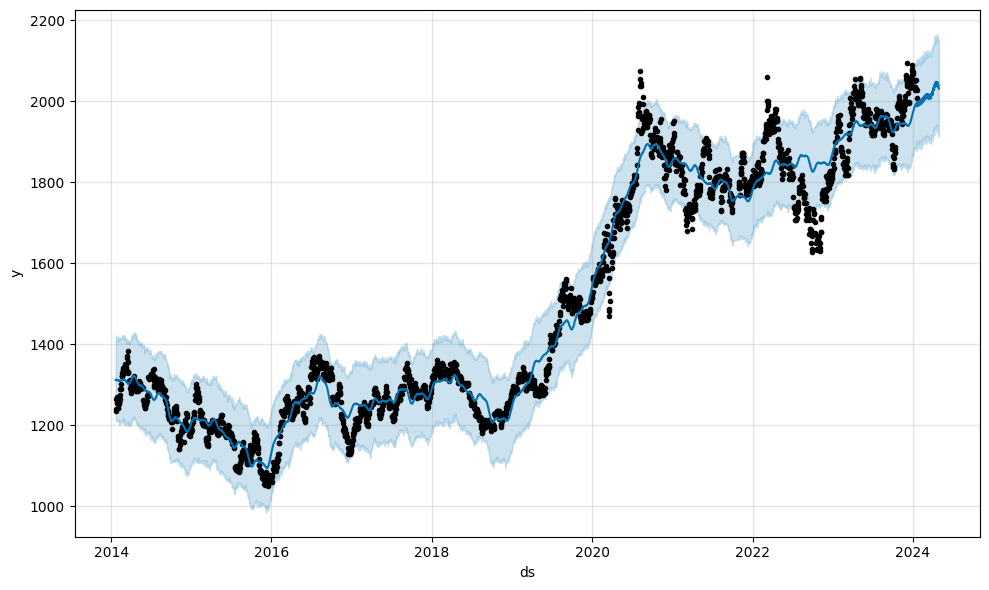

In [118]:
plot1 = m.plot(forecast)

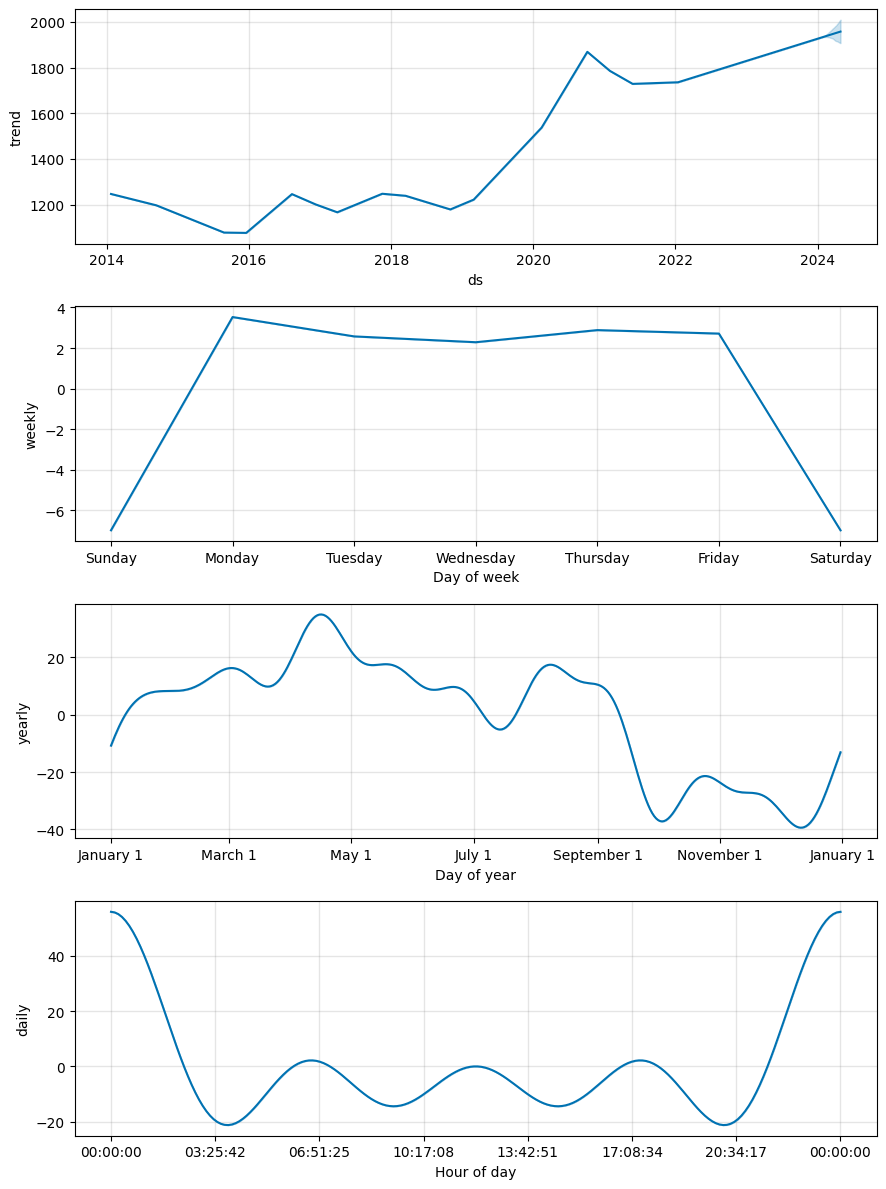

In [119]:
plot2 = m.plot_components(forecast)